# <center> Hypothesis V :Outstanding balances(debt) vs House Price

Data Source : https://www.fca.org.uk/data/mortgage-lending-statistics

In [2]:
#importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from pandas.plotting import lag_plot
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df_mor = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/mlar-statistics-q1-2022-summary-long-run.xlsx',sheet_name='Sheet1')
df_mor.head()

,Year,Quarter,Arrear_Number_of_loan_accounts,Arrears_Balances_outstanding(Millions),Loan_Book_Number_of_loan_accounts,Loan_Book_Balances_outstanding(Millions)
0,2007,Q1,258659,21916.866,15046772,1064363.837
1,2007,Q2,267210,23041.773,15473936,1108071.119
2,2007,Q3,273541,24262.272,15475000,1137898.315
3,2007,Q4,288546,26236.605,15505441,1159861.965
4,2008,Q1,299588,28439.189,15619464,1177761.935


In [4]:
#checking the statiscs of the dataset
df_mor.describe()

,Year,Arrear_Number_of_loan_accounts,Arrears_Balances_outstanding(Millions),Loan_Book_Number_of_loan_accounts,Loan_Book_Balances_outstanding(Millions)
count,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,2014.131148,250872.983607,23718.952508,1.416759e+07,1.313047e+06
std,4.440253,73441.630523,9425.993455,9.160587e+05,1.399246e+05
min,2007.000000,152929.000000,13321.940000,1.317537e+07,1.064364e+06
25%,2010.000000,185317.000000,14819.821000,1.340325e+07,1.213054e+06
50%,2014.000000,228517.000000,21768.696000,1.350203e+07,1.256161e+06
75%,2018.000000,303163.000000,30292.753000,1.506973e+07,1.407437e+06
max,2022.000000,399365.000000,43572.226000,1.564983e+07,1.630492e+06


In [5]:
#checking the data dtypes
df_mor.dtypes

Year                                          int64
Quarter                                      object
Arrear_Number_of_loan_accounts                int64
Arrears_Balances_outstanding(Millions)      float64
Loan_Book_Number_of_loan_accounts             int64
Loan_Book_Balances_outstanding(Millions)    float64
dtype: object

In [6]:
#checking the dataset's to and from dates
print("Starting year of Mortgage Data :",df_mor.Year.min())
print("Ending year of Mortgage data :",df_mor.Year.max())

Starting year of Mortgage Data : 2007
Ending year of Mortgage data : 2022


Columns of Dataset :
- Year : This shows the year 
- Quarter : It shows the quarter of the year
- Arrear_Number_of_loan_accounts : It shows the Number of loan accounts which are still pending
- Arrears_Balances_outstanding(Millions) : It shows the total outstanding balance of loans(in millions) which are still pending.
- Loan_Book_Number_of_loan_accounts : It shows the total number of loans in the particular year/quarter from the loan book.
- Loan_Book_Balances_outstanding(Millions) :It shows the total outstanding balance of loans (in millions) in the particular year/quarter from the loan book.

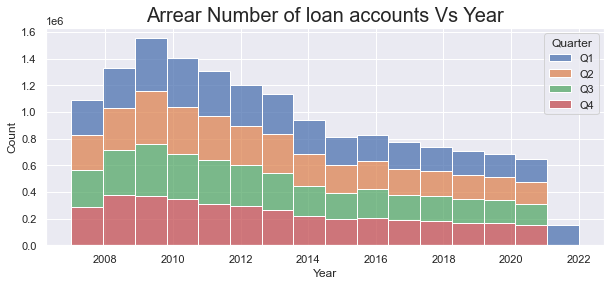

In [7]:
#plotting the Arrear_Number_of_loan_accounts with year and quarters
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.histplot(data = df_mor,x='Year',weights='Arrear_Number_of_loan_accounts',hue='Quarter',multiple='stack',bins=16)
plt.title('Arrear Number of loan accounts Vs Year',fontdict={'fontsize':20})
plt.show()

We can see in the above chart that number of arrear loans were at the top around 2008 , it was due to the market crash crisis.

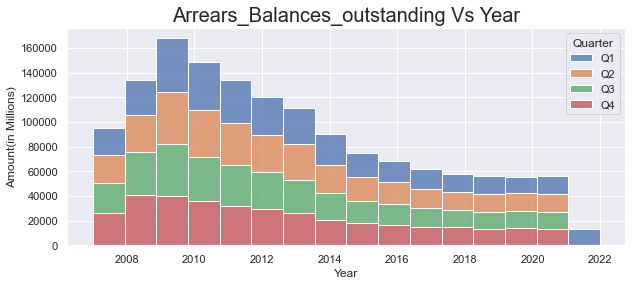

In [8]:
#plotting the Arrears_Balances_outstanding(Millions) with year and quarters
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.histplot(data = df_mor,x='Year',weights='Arrears_Balances_outstanding(Millions)',hue='Quarter',multiple='stack',bins=16)
plt.title('Arrears_Balances_outstanding Vs Year',fontdict={'fontsize':20})
plt.ylabel("Amount(in Millions)")
plt.show()

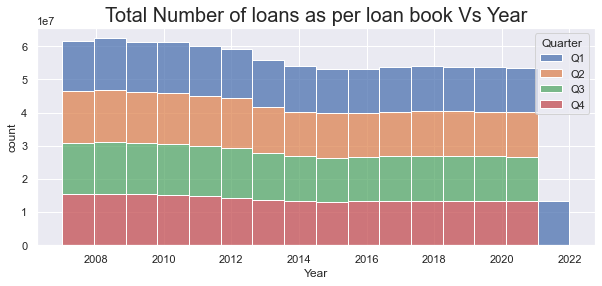

In [9]:
#plotting the total number of loans with year and quarters
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.histplot(data = df_mor,x='Year',weights='Loan_Book_Number_of_loan_accounts',hue='Quarter',multiple='stack',bins=16)
plt.title('Total Number of loans as per loan book Vs Year',fontdict={'fontsize':20})
plt.ylabel("count")
plt.show()

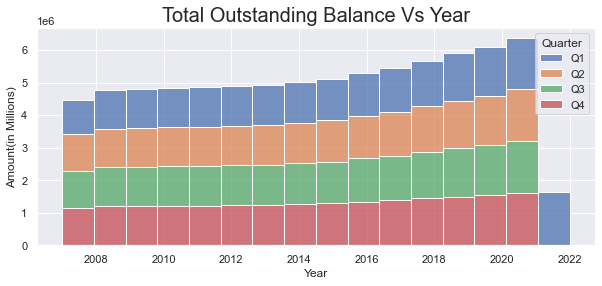

In [10]:
#plotting the Loan_Book_Balances_outstanding(Millions) with year and quarters
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.histplot(data = df_mor,x='Year',weights='Loan_Book_Balances_outstanding(Millions)',hue='Quarter',multiple='stack',bins=16)
plt.title('Total Outstanding Balance Vs Year',fontdict={'fontsize':20})
plt.ylabel("Amount(in Millions)")
plt.show()

From the above chart we could clearly see that outstanding balance is increasing per year.

In [11]:
#grouping by year and quarter
df_grouped = df_mor.groupby('Year').mean()
df_grouped.reset_index(inplace=True)
df_grouped.head()

,Year,Arrear_Number_of_loan_accounts,Arrears_Balances_outstanding(Millions),Loan_Book_Number_of_loan_accounts,Loan_Book_Balances_outstanding(Millions)
0,2007,271989.00,23864.3790,15375287.25,1.117549e+06
1,2008,331897.50,33555.2775,15609430.25,1.190889e+06
2,2009,388116.50,42011.9935,15361548.75,1.202504e+06
3,2010,350380.50,37119.9375,15315490.50,1.210379e+06
4,2011,326809.75,33516.7295,15052559.00,1.215794e+06


In [12]:
#creating a calculative field of percentage of arrear_loans over total loans
df_grouped['%Arrear_loans'] =(df_grouped['Arrear_Number_of_loan_accounts']/df_grouped['Loan_Book_Number_of_loan_accounts'])*100
#creating a calculative field of percentage of arrear_loans over total loans
df_grouped['%Arrear_balance'] =(df_grouped['Arrears_Balances_outstanding(Millions)']/df_grouped['Loan_Book_Balances_outstanding(Millions)'])*100

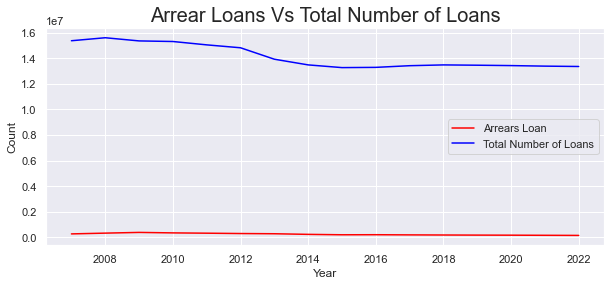

In [13]:
#plotting the arrear_no_of_loans and loan_book_number_of_loans

plt.figure(figsize=(10,4))
sns.lineplot(data=df_grouped,x='Year',y='Arrear_Number_of_loan_accounts',color='red',label='Arrears Loan')
sns.lineplot(data=df_grouped,x='Year',y='Loan_Book_Number_of_loan_accounts',color='blue',label='Total Number of Loans')
plt.title('Arrear Loans Vs Total Number of Loans',fontdict={'fontsize':20})
plt.ylabel("Count")
plt.show()

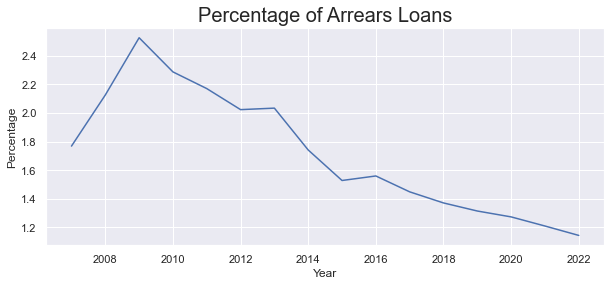

In [14]:
#plotting the percentage of arrears loans
plt.figure(figsize=(10,4))
sns.lineplot(data=df_grouped,x='Year',y='%Arrear_loans')
plt.title('Percentage of Arrears Loans',fontdict={'fontsize':20})
plt.ylabel("Percentage")
plt.show()

From the above chart, we can see that the from 2009 , the percentage of arrears loans have decreased.While , around 2008 it was the highest due to financial crisis.

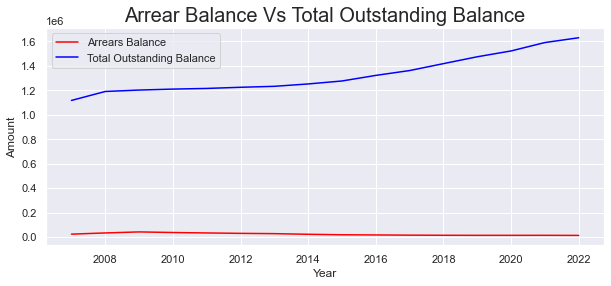

In [15]:
#plotting the Arrears_Balances_outstanding(Millions) and loan_book_number_of_loans

plt.figure(figsize=(10,4))
sns.lineplot(data=df_grouped,x='Year',y='Arrears_Balances_outstanding(Millions)',color='red',label='Arrears Balance')
sns.lineplot(data=df_grouped,x='Year',y='Loan_Book_Balances_outstanding(Millions)',color='blue',label='Total Outstanding Balance')
plt.title('Arrear Balance Vs Total Outstanding Balance',fontdict={'fontsize':20})
plt.ylabel("Amount")
plt.show()

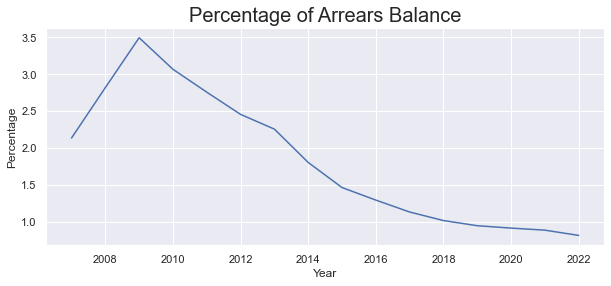

In [16]:
#plotting the percentage of arrears loans
plt.figure(figsize=(10,4))
sns.lineplot(data=df_grouped,x='Year',y='%Arrear_balance')
plt.title('Percentage of Arrears Balance',fontdict={'fontsize':20})
plt.ylabel("Percentage")
plt.show()

From the above chart, we can see that the from 2009 , the percentage of arrears loans balance have decreased.While , around 2008 it was the highest due to financial crisis.

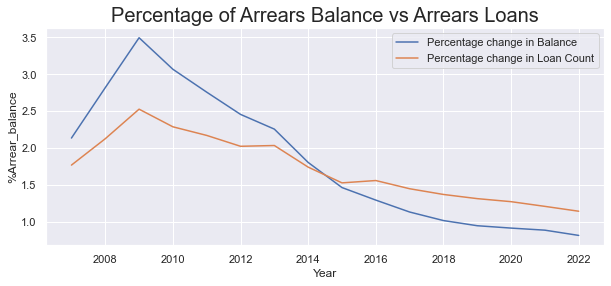

In [17]:
#plotting total arrears percentage and total percentage arrears balances
plt.figure(figsize=(10,4))
sns.lineplot(data=df_grouped,x='Year',y='%Arrear_balance',label='Percentage change in Balance')
sns.lineplot(data=df_grouped,x='Year',y='%Arrear_loans',label='Percentage change in Loan Count')
plt.title('Percentage of Arrears Balance vs Arrears Loans',fontdict={'fontsize':20})
# plt.ylabel("Percentage")
plt.show()

We can see from the above chart that the arrear balance have reduced however the arrears loan count have increased.

In [36]:
# importing house price dataset
# importing the dataset for UK house prices from ONS
df_HP = pd.read_csv(r'C:/Users/hp/dissertation/Datasets/Average-prices-2022-05_ONS.csv')
#since the region_name contains all the regions, we would take the region_name as United Kingdom
df_HP = df_HP[df_HP.Region_Name=='United Kingdom']
#we require only the date and average_price
df_HP = df_HP[['Date','Average_Price']]
df_HP.tail()

,Date,Average_Price
135249,1/1/2022,273456.5823
135670,2/1/2022,275790.5151
136091,3/1/2022,277525.3981
136512,4/1/2022,280084.2286
136933,5/1/2022,283496.3573


In [37]:
# checking the statistics 
df_HP.describe()

,Average_Price
count,650.000000
mean,92682.855832
std,79576.598379
min,3594.602239
25%,21506.687970
50%,58249.724790
75%,167885.249350
max,283496.357300


We can see from the above table , that maximum price is 283496.357 whereas the minium is 3594.60 with a mean of 92682.85 and standard deviation of 79576.59

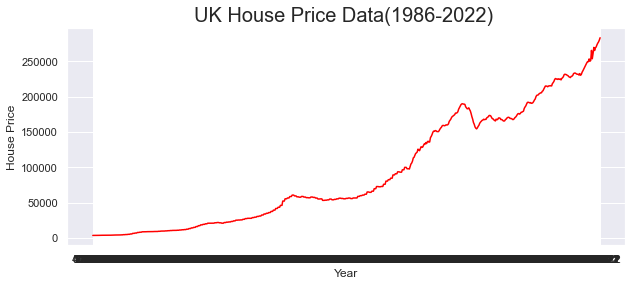

In [39]:
#plotting the House Price data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.lineplot(data = df_HP, x='Date',y='Average_Price',err_style='bars',color='red')
plt.title("UK House Price Data(1986-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('House Price')
plt.show()

In [40]:
#converting the date column into datetime format
df_HP['Date']=pd.to_datetime(df_HP['Date'])

In [43]:
#converting the monthly data into quarterly data
df_qtr = pd.DataFrame(df_HP.set_index('Date').resample('Q')['Average_Price'].mean())
df_qtr.head()

,Average_Price
Date,
1968-06-30,3594.602239
1968-09-30,3716.453163
1968-12-31,3696.144675
1969-03-31,3757.070137
1969-06-30,3817.995599


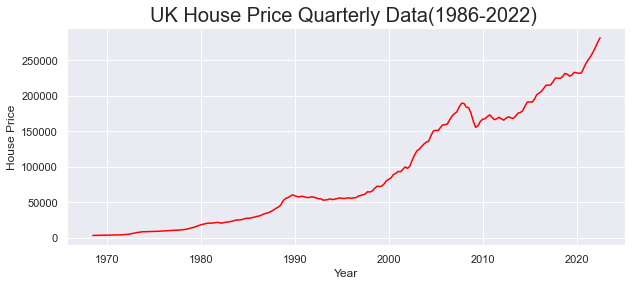

In [44]:
#plotting the House Price quarterly data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
sns.lineplot(data = df_qtr, x='Date',y='Average_Price',err_style='bars',color='red')
plt.title("UK House Price Quarterly Data(1986-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('House Price')
plt.show()

In [45]:
#since the dataset of loans is from 2007 Q1 till 2022 Q1 ,thus slicing the house price data as well
start =pd.to_datetime('2006-12-31')
df_qtr =df_qtr[df_qtr.index>start][:-1]
df_qtr.tail()

,Average_Price
Date,
2021-03-31,250927.062667
2021-06-30,255691.626400
2021-09-30,261520.932267
2021-12-31,268356.800967
2022-03-31,275590.831833


In [46]:
#joining the dataset of loans into house price
df_qtr[['Out_Balance','Ar_Balance']]=df_mor[['Loan_Book_Balances_outstanding(Millions)','Arrears_Balances_outstanding(Millions)']].values
df_qtr.head()

,Average_Price,Out_Balance,Ar_Balance
Date,,,
2007-03-31,177551.810000,1064363.837,21916.866
2007-06-30,184307.053300,1108071.119,23041.773
2007-09-30,189502.866233,1137898.315,24262.272
2007-12-31,189423.837533,1159861.965,26236.605
2008-03-31,184270.348033,1177761.935,28439.189


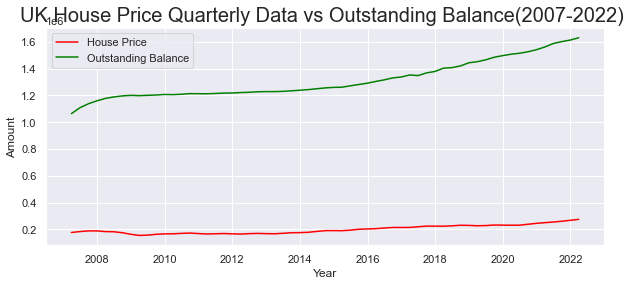

In [47]:
plt.figure(figsize=(10,4))
sns.lineplot(data = df_qtr, x='Date',y='Average_Price',err_style='bars',color='red',label='House Price')
sns.lineplot(data = df_qtr, x='Date',y='Out_Balance',err_style='bars',color='green',label='Outstanding Balance')
plt.title("UK House Price Quarterly Data vs Outstanding Balance(2007-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('Amount')
plt.show()

Performing Granger-Causality Test
Source :https://rishi-a.github.io/2020/05/25/granger-causality.html

The Granger Causality test is used to determine whether or not one time series is useful for forecasting another. This test uses the following null and alternative hypotheses:

<b>Null Hypothesis (H0)</b>: Time series Loan data does not Granger-cause time series HP

<b>Alternative Hypothesis (HA)</b>: Time series Loan data Granger-causes time series HP

The term “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period. This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

Step 1: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


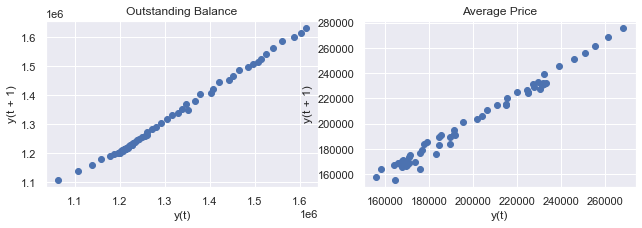

In [48]:
#plotting the lag_plots for Bank rate and HP
fig,axes = plt.subplots(1, 2, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_qtr['Out_Balance'], ax=axes[0])
axes[0].set_title('Outstanding Balance')
lag_plot(df_qtr['Average_Price'], ax=axes[1])
axes[1].set_title('Average Price')
plt.show()

we Can see that both the time series have high autocorrelation.

In [49]:
# differencing the data
df1 = df_qtr.copy()
df_qtr['Out_Balance'] = df_qtr['Out_Balance']- df_qtr['Out_Balance'].shift(1)
df_qtr['Average_Price'] = df_qtr['Average_Price']- df_qtr['Average_Price'].shift(1)
df_qtr = df_qtr.dropna()
df_qtr.head()

,Average_Price,Out_Balance,Ar_Balance
Date,,,
2007-06-30,6755.243300,43707.282,23041.773
2007-09-30,5195.812933,29827.196,24262.272
2007-12-31,-79.028700,21963.650,26236.605
2008-03-31,-5153.489500,17899.970,28439.189
2008-06-30,-1188.395133,10854.644,30292.753


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


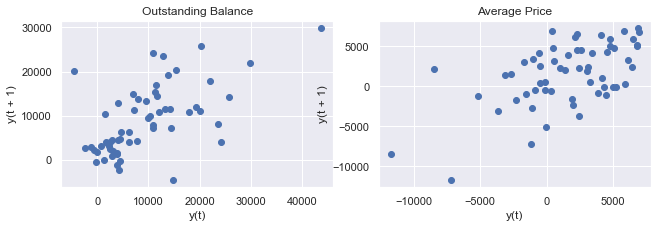

In [50]:
#plotting the lag_plots for Bank rate and HP
fig,axes = plt.subplots(1, 2, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_qtr['Out_Balance'], ax=axes[0])
axes[0].set_title('Outstanding Balance')
lag_plot(df_qtr['Average_Price'], ax=axes[1])
axes[1].set_title('Average Price')
plt.show()

In [51]:
#defining a function for dicky fuller test
def adfuller_test(columns):
    result=adfuller(columns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [52]:
#applying Dickey Fuller test on loans
adfuller_test(df_qtr['Out_Balance'])

ADF Test Statistic : -1.2399652020263796
p-value : 0.6561718684286326
#Lags Used : 6
Number of Observations Used : 53
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
#applying Dickey Fuller test on House Prices
adfuller_test(df_qtr['Average_Price'])

ADF Test Statistic : -1.7644808549721536
p-value : 0.39823301895379337
#Lags Used : 6
Number of Observations Used : 53
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### We can see from above tests that ADF Null Hypothesis is rejected: thus data is stationary.Moreover , the above lag plots give confirmation that the data is stationary

Step 2: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc. Result: We saw above that for our case m = 1

Step 3: Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

Step 4: Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.

In [54]:
# applying VAR model and finding the AIC, BIC
df1 = df1.dropna()
model = VAR(df1[['Out_Balance','Average_Price']]) #recall that rawData is w/o difference operation
for i in range(1,13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        
    except:
        continue

Lag Order = 1
AIC :  33.825561173371256
BIC :  34.03499562959346
Lag Order = 2
AIC :  33.1939311485623
BIC :  33.54605613905479
Lag Order = 3
AIC :  32.93735251853675
BIC :  33.43470083142726
Lag Order = 4
AIC :  32.63794092870259
BIC :  33.28311501328193
Lag Order = 5
AIC :  32.73649753978142
BIC :  33.53217141828451
Lag Order = 6
AIC :  32.14110390394199
BIC :  33.09002504605188
Lag Order = 7
AIC :  32.14277181305674
BIC :  33.24776295003689
Lag Order = 8
AIC :  31.99805415903871
BIC :  33.262015009241956
Lag Order = 9
AIC :  31.96527434340772
BIC :  33.39118321467877
Lag Order = 10
AIC :  31.943893784076938
BIC :  33.53480901102638
Lag Order = 11
AIC :  31.471710760432966
BIC :  33.23077192542686
Lag Order = 12
AIC :  31.549982074123218
BIC :  33.48041094974631


Result: The lag-order p = 11 on the basis of Akaike Information Criterion (AIC)

In [55]:
#perform Granger-Causality test 
grangercausalitytests(df_qtr[['Average_Price','Out_Balance']], maxlag=[11])


Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.7096  , p=0.1269  , df_denom=26, df_num=11
ssr based chi2 test:   chi2=35.4419 , p=0.0002  , df=11
likelihood ratio test: chi2=26.6679 , p=0.0052  , df=11
parameter F test:         F=1.7096  , p=0.1269  , df_denom=26, df_num=11


{11: ({'ssr_ftest': (1.709625603862282, 0.1268775839824467, 26.0, 11),
   'ssr_chi2test': (35.44185386468346, 0.00020945616915489927, 11),
   'lrtest': (26.667901092791908, 0.005156428596696458, 11),
   'params_ftest': (1.7096256038615918, 0.12687758398261895, 26.0, 11.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 

##### The F test statistic turns out to be 1.7096   and the corresponding p-value is 0.1269 for lag=11. Since the p-value is more than .05,we can accept the null hypothesis of the test and conclude that knowing the Outstanding Loans is not useful for predicting the future House Prices

## Trying reverse check

In [56]:
#perform Granger-Causality test 
grangercausalitytests(df_qtr[['Out_Balance','Average_Price']], maxlag=[11])


Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.3518  , p=0.2532  , df_denom=26, df_num=11
ssr based chi2 test:   chi2=28.0249 , p=0.0032  , df=11
likelihood ratio test: chi2=22.1631 , p=0.0231  , df=11
parameter F test:         F=1.3518  , p=0.2532  , df_denom=26, df_num=11


{11: ({'ssr_ftest': (1.351849957977892, 0.2531967271920684, 26.0, 11),
   'ssr_chi2test': (28.02488951346476, 0.0032090465977463786, 11),
   'lrtest': (22.163107285389856, 0.023139643967026603, 11),
   'params_ftest': (1.3518499579778214, 0.25319672719210207, 26.0, 11.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0

### Since the p-value is more than .05,we can accept the null hypothesis of the test and conclude that knowing the Outstanding Loans is not useful for predicting the future House Prices